In [ ]:
import requests as req
import pandas as pd
from bs4 import BeautifulSoup as bs #este alias es standard
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster") #paper, notebook, talk, poster
sns.set(rc={"figure.figsize": (8.,4.)}) #Tamaño de las figuras
sns.set_style("whitegrid") #darkgrid, whitegrid, dark, white, ticks

## PRIMERO REVISO LA URL Y ME DOY CUENTA QUE CONTIENE 50 PAGINAS Y CADA PAGINA ALMACENA 20 ELEMENTOS, ENTONCES CREO UNA LISTA VACIA Y UN FOR CON RANGE DESDE EL 1 HASTA EL 51 PARA ITERAR EN CADA NUMERO DE PAGINA. EN LA VARIABLE URL HAGO UN FORMATO STRING PARA IR ITERANDO EN CADA PAGINA. LO QUE QUIERO ES ALMACENAR CADA URL DE CADA LIBRO Y GUARDARLA EN UNA LISTA

In [ ]:
urls = []
for e in range(1,51):
  url_1 = f'https://books.toscrape.com/catalogue/page-{e}.html'
  html_1 = req.get(url_1).content
  soup_1 = bs(html_1, 'html.parser')
  libros = soup_1.find_all('h3')# [1]('a')[0]['href']
  enlaces = [e('a')[0]['href'] for e in libros]
  urls.append(enlaces)

In [ ]:
type(urls)

list

## TENGO UNA LISTA CON TODOS LOS URL DE LOS LIBROS PERO ME HA GENERADO UNA LISTA DE LISTAS, LO QUE HAGO ES CONVERTIRLA EN UNA LISTA DE 1000 ELEMENTOS QUE SON LA CANTIDAD DE LIBROS TOTALES QUE HAY EN LA WEB USANDO UN EXTEND EN UNA LISTA COMPRIMIDA

In [ ]:
lista_url = []
lista_url.extend(x for e in urls for x in e)
lista_url

## Ahora quiero ver si mi teoria es correcta de iterar en cada URL de los libros para obtener toda la informacion

In [ ]:
titulos_lista = []
genero_lista = []
upc_lista = []
estrellas_lista = []
disp_lista = []
cant_lista = []
tipo_lista = []
reviews_lista = []
sin_tax_lista = []
con_tax_lista = []
tax_lista = []
texto_unido_lista = []
imagen_lista = []

for e in lista_url:
  url = f'https://books.toscrape.com/catalogue/{e}'
  html = req.get(url).content
  soup = bs(html, 'html.parser')
  titulos = soup.h1.text
  genero = soup.find_all('li')[2].text.replace('\n','')
  upc = soup.find_all('td')[0].text
  estrellas = soup.find_all('p', class_= 'star-rating')[0]['class'][1]
  disp = soup.find_all('p')[1].text.replace('\n','').strip().split('(')[0]
  cant = soup.find_all('p')[1].text.replace('\n','').strip().split('(')[1].split(' ')[0]
  tipo = soup.find_all('td')[1].text
  reviews = soup.find_all('td')[6].text
  sin_tax = soup.find_all('td')[2].text.replace('£','')
  con_tax = soup.find_all('td')[3].text.replace('£','')
  tax = soup.find_all('td')[4].text.replace('£','')
  texto = soup.find_all('p')[3].text.split()[:100] # El Split()[:100] sirve para tomar las primeras 100 palabras de esa cadena, pero me la separa en elementos
  texto_unido = ' '.join(texto)                    # luego el ' '.join me une todos los elementos que hay en la cadena texto en una sola string dejando un espacio de por medio
  imagen = 'https://books.toscrape.com/' + soup.find('img').attrs['src'].replace('../','') # Al extraer la url me doy cuenta que falta la parte inicial, asi que lo coloco en string al comienzo de la variable y se lo sumo al resultado del soup
  titulos_lista.append(titulos)
  genero_lista.append(genero)
  upc_lista.append(upc)
  estrellas_lista.append(estrellas)
  disp_lista.append(disp)
  cant_lista.append(cant)
  tipo_lista.append(tipo)
  reviews_lista.append(reviews)
  sin_tax_lista.append(sin_tax)
  con_tax_lista.append(con_tax)
  tax_lista.append(tax)
  texto_unido_lista.append(texto_unido)
  imagen_lista.append(imagen)


## Aparentemente todo funciono bien, me doy cuenta que la lista de estrellas, me las da en formato letras y no en numero, creo un diccionario y hago un mapeo para cambiar cada valor en la lista de estrella por numeros

In [ ]:
mapeo = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
estrellas_lista_numeros = [mapeo[e] for e in estrellas_lista]
estrellas_lista_numeros

## En la lista de URL de libros, falta el inicio de la url asi que se la sumo a cada valor en la lista

In [ ]:
url_libro = ['https://books.toscrape.com/catalogue/'+ e for e in lista_url]

## Como se que los libros por defecto vienen ordenados desde el 1000 hasta el 1, creo una lista de 1000 numeros en orden descendente

In [ ]:
orden_libros = list(range(1000, 0, -1)) # ÑAPA

## Ya que los autores no estan en la web de los libros, tuve que buscar en otras paginas hasta que encontre una que funciona. Hay libros con titulos muy largos y el buscador de la pagina no los reconoce asi que les corte el nombre con las primeras 6 palabras

In [ ]:
titulos_cortos = [' '.join(e.split(' ')[:6]) for e in titulos_lista]
len(titulos_cortos)

1000

In [ ]:
autor_lista = []
for e in titulos_cortos:
  url3 = f'https://www.goodreads.com/search?q={e}'
  html3 = req.get(url3).content
  soup3 = bs(html3, 'html.parser')
  autores = soup3.find_all('span', itemprop='name') #Debido a que puede que esta pagina no tenga todos los libros
  if autores: # He creado un if para darle la condicion, de que si tiene lo que necesito lo apendee a la lista vacia
          autor = autores[1].text
          autor_lista.append(autor)
  else:   # En caso de que no haya datos, agrego el valor de Datos No Disponibles
          autor_lista.append('Datos no disponibles')

In [ ]:
autor_lista

## Finalmente creamos el dataframe para poder mirar los datos, graficar y sacar las conclusiones

In [ ]:
df = pd. DataFrame({'Título del Libro': titulos_lista,
                    'Autor': autor_lista,
                    'Genero': genero_lista,
                    'UPC':upc_lista,
                    'Nº de estrellas': estrellas_lista_numeros,
                    'Disponibilidad':disp_lista,
                    'Nº Disponibles':cant_lista,
                    'Tipo de producto':tipo_lista,
                    'Nº de reviews':reviews_lista,
                    'Precio Sin Tax':sin_tax_lista,
                    'Precio Con Tax':con_tax_lista,
                    'Taxes':tax_lista,
                    'Orden del Libro':orden_libros,
                    'Descripción del libro':texto_unido_lista,
                    'Imagen del libro':imagen_lista,
                    'Url del libro':url_libro})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Título del Libro       1000 non-null   object
 1   Autor                  1000 non-null   object
 2   Genero                 1000 non-null   object
 3   UPC                    1000 non-null   object
 4   Nº de estrellas        1000 non-null   int64 
 5   Disponibilidad         1000 non-null   object
 6   Nº Disponibles         1000 non-null   object
 7   Tipo de producto       1000 non-null   object
 8   Nº de reviews          1000 non-null   object
 9   Precio Sin Tax         1000 non-null   object
 10  Precio Con Tax         1000 non-null   object
 11  Taxes                  1000 non-null   object
 12  Orden del Libro        1000 non-null   int64 
 13  Descripción del libro  1000 non-null   object
 14  Imagen del libro       1000 non-null   object
 15  Url del libro         

## Al mirar la info del DataFrame me doy cuenta que hay columnas en formato object que deberian ser numericas, procedo a realizar los cambios

In [ ]:
colum_numericas = ['Nº Disponibles', 'Nº de reviews', 'Precio Sin Tax', 'Precio Con Tax', 'Taxes']
df[colum_numericas] = df[colum_numericas].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Título del Libro       1000 non-null   object 
 1   Autor                  1000 non-null   object 
 2   Genero                 1000 non-null   object 
 3   UPC                    1000 non-null   object 
 4   Nº de estrellas        1000 non-null   int64  
 5   Disponibilidad         1000 non-null   object 
 6   Nº Disponibles         1000 non-null   int64  
 7   Tipo de producto       1000 non-null   object 
 8   Nº de reviews          1000 non-null   int64  
 9   Precio Sin Tax         1000 non-null   float64
 10  Precio Con Tax         1000 non-null   float64
 11  Taxes                  1000 non-null   float64
 12  Orden del Libro        1000 non-null   int64  
 13  Descripción del libro  1000 non-null   object 
 14  Imagen del libro       1000 non-null   object 
 15  Url d

## Verifico la cantidad de 'Datos no disponibles' que me da la columna Autor

In [ ]:
len(df.loc[df['Autor'] == 'Datos no disponibles'])

26

## Hago una lista de los libros con Autor No Disponible solo para verificar que de verdad no exiten en la pagina

In [ ]:
libros_autor_no_disponible = df.loc[df['Autor'] == 'Datos no disponibles', 'Título del Libro'].tolist()
libros_autor_no_disponible

['#HigherSelfie: Wake Up Your Life. Free Your Soul. Find Your Tribe.',
 'Untitled Collection: Sabbath Poems 2014',
 'Saga, Volume 6 (Saga (Collected Editions) #6)',
 'Saga, Volume 5 (Saga (Collected Editions) #5)',
 'Large Print Heart of the Pride',
 'Amatus',
 'Wonder Woman: Earth One, Volume One (Wonder Woman: Earth One #1)',
 'Red Hood/Arsenal, Vol. 1: Open for Business (Red Hood/Arsenal #1)',
 "It's All Easy: Healthy, Delicious Weeknight Meals in under 30 Minutes",
 'Snatched: How A Drug Queen Went Undercover for the DEA and Was Kidnapped By Colombian Guerillas',
 'Poisonous (Max Revere Novels #3)',
 'M Train',
 'Cravings: Recipes for What You Want to Eat',
 'Hystopia: A Novel',
 'Nightstruck: A Novel',
 'The God Delusion',
 'In the Woods (Dublin Murder Squad #1)',
 'The Cat in the Hat (Beginner Books B-1)',
 'Saga, Volume 3 (Saga (Collected Editions) #3)',
 'Midnight Riot (Peter Grant/ Rivers of London - books #1)',
 '#GIRLBOSS',
 'The Suffragettes (Little Black Classics, #96)',
 

## Me he dado cuenta que los libros SI existen en la pagina pero por la cantidad de caracteres especiales que tienen, el buscador se vuelve medio loco y no me los reconoce y como me da TOC y necesito tener los 1000 autores, procedo a hacer el siguiente codigo

In [ ]:
reemplazo = '!,.:;-()#/?&' #Creo una variable con los posibles caracteres especiales que tiene el nombre del libro
titulos_sin_especiales = []
for e in libros_autor_no_disponible: # un for para iterar dentro de los libros con autores no disponibles
  for n in reemplazo:
    e = e.replace(n, ' ') #cada vez que encuentre un caracter especial, me lo va a reemplazar con un espacio en blanco
  titulos_sin_especiales.append(e)
titulos_mas_cortos = [' '.join(e.split(' ')[:3]) for e in titulos_sin_especiales] #y tambien me he dado cuenta que tengo que colocar el nombre del libro mas corto para que funcione

In [ ]:
autor_lista4 = []
for e in titulos_mas_cortos:
  url4 = f'https://www.goodreads.com/search?q={e}'
  html4 = req.get(url4).content
  soup4 = bs(html4, 'html.parser')
  autores4 = soup4.find_all('span', itemprop='name')[1].text
  autor_lista4.append(autores4)
len(autor_lista4)

26

In [ ]:
autor_lista4

['Lucy Sheridan',
 'To be confirmed',
 'Brian K. Vaughan',
 'Brian K. Vaughan',
 'Caroline  Fyffe',
 'Alydia Rackham',
 'Leigh Bardugo',
 'Scott Lobdell',
 'Gwyneth Paltrow',
 'Victor Gold',
 'Allison Brennan',
 'Patti Smith',
 'Chrissy Teigen',
 'David Means',
 'Jenna Black',
 'Richard Dawkins',
 'Bill Bryson',
 'Dr. Seuss',
 'Brian K. Vaughan',
 'Ben Aaronovitch',
 'Sophia Amoruso',
 'Koa Beck',
 'Brian K. Vaughan',
 'Brian K. Vaughan',
 'Jack Kerouac',
 'Helen Fielding']

In [ ]:
df.loc[df['Autor'] == 'Datos no disponibles', 'Autor'] = autor_lista4 #Esto es para reemplazar la nueva lista de autores dentro de la lista vieja con datos no disponibles

## Guardo mi df en una carpeta en Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df.to_csv('/content/drive/MyDrive/Hexas/libros.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Hago una copia para pasar a traducir el df con la libreria de Google

In [ ]:
df2 = df.copy()
df2.head(2)

,Título del Libro,Autor,Genero,UPC,Nº de estrellas,Disponibilidad,Nº Disponibles,Tipo de producto,Nº de reviews,Precio Sin Tax,Precio Con Tax,Taxes,Orden del Libro,Descripción del libro,Imagen del libro,Url del libro
0,A Light in the Attic,Shel Silverstein,Poetry,a897fe39b1053632,3,In stock,22,Books,0,51.77,51.77,0.0,1000,It's hard to imagine a world without A Light i...,https://books.toscrape.com/media/cache/fe/72/f...,https://books.toscrape.com/catalogue/a-light-i...
1,Tipping the Velvet,Sarah Waters,Historical Fiction,90fa61229261140a,1,In stock,20,Books,0,53.74,53.74,0.0,999,"""Erotic and absorbing...Written with starling ...",https://books.toscrape.com/media/cache/08/e9/0...,https://books.toscrape.com/catalogue/tipping-t...


In [ ]:
pip install deep-translator


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 976.3 kB/s eta 0:00:00


In [ ]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source="auto", target="es")

In [ ]:
lista=['Título del Libro', 'Genero', 'Disponibilidad', 'Tipo de producto', 'Descripción del libro']

for e in lista:
 df2[e]=df2[e].apply(translator.translate)
  #traduccion = translator.translate(e)
df2

,Título del Libro,Autor,Genero,UPC,Nº de estrellas,Disponibilidad,Nº Disponibles,Tipo de producto,Nº de reviews,Precio Sin Tax,Precio Con Tax,Taxes,Orden del Libro,Descripción del libro,Imagen del libro,Url del libro
0,Una luz en el ático,Shel Silverstein,Poesía,a897fe39b1053632,3,En stock,22,Libros,0,51.77,51.77,0.0,1000,Es difícil imaginar un mundo sin Una luz en el...,https://books.toscrape.com/media/cache/fe/72/f...,https://books.toscrape.com/catalogue/a-light-i...
1,Inclinar el terciopelo,Sarah Waters,Ficción histórica,90fa61229261140a,1,En stock,20,Libros,0,53.74,53.74,0.0,999,"""Erótico y absorbente... Escrito con el poder ...",https://books.toscrape.com/media/cache/08/e9/0...,https://books.toscrape.com/catalogue/tipping-t...
2,Sumisión,Michel Houellebecq,Ficción,6957f44c3847a760,1,En stock,20,Libros,0,50.10,50.10,0.0,998,"En una Francia muy parecida a la nuestra, un h...",https://books.toscrape.com/media/cache/ee/cf/e...,https://books.toscrape.com/catalogue/soumissio...
3,Objetos afilados,Gillian Flynn,Misterio,e00eb4fd7b871a48,4,En stock,20,Libros,0,47.82,47.82,0.0,997,"MALVADA por encima del hueso de la cadera, NIÑ...",https://books.toscrape.com/media/cache/c0/59/c...,https://books.toscrape.com/catalogue/sharp-obj...
4,Sapiens: una breve historia de la humanidad,Yuval Noah Harari,Historia,4165285e1663650f,5,En stock,20,Libros,0,54.23,54.23,0.0,996,De un renombrado historiador llega una narrati...,https://books.toscrape.com/media/cache/ce/5f/c...,https://books.toscrape.com/catalogue/sapiens-a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Alicia en el país de las maravillas (Las avent...,Lewis Carroll,Clásicos,cd2a2a70dd5d176d,1,En stock,1,Libros,0,55.53,55.53,0.0,5,,https://books.toscrape.com/media/cache/99/df/9...,https://books.toscrape.com/catalogue/alice-in-...
996,"Clase: Semihumano, Volumen 1 (Clase: Semihuman...",Gamon Sakurai,Arte Secuencial,bfd5e1701c862ac3,4,En stock,1,Libros,0,57.06,57.06,0.0,4,El estudiante de secundaria Kei Nagai muere at...,https://books.toscrape.com/media/cache/30/98/3...,https://books.toscrape.com/catalogue/ajin-demi...
997,La devoción de un espía (Los espías de la rege...,Melanie Dickerson,Ficción histórica,19fec36a1dfb4c16,5,En stock,1,Libros,0,16.97,16.97,0.0,3,"En la era de la Regencia de Inglaterra, los mo...",https://books.toscrape.com/media/cache/f9/6b/f...,https://books.toscrape.com/catalogue/a-spys-de...
998,1.º en morir (Club de asesinatos de mujeres n....,James Patterson,Misterio,f684a82adc49f011,1,En stock,1,Libros,0,53.98,53.98,0.0,2,"James Patterson, autor de las exitosas novelas...",https://books.toscrape.com/media/cache/f6/8e/f...,https://books.toscrape.com/catalogue/1st-to-di...


In [ ]:
df2.to_csv('/content/drive/MyDrive/Hexas/libros_espanol.csv', index=False)

# Ya con el Data Frame arreglado, vamos a realizar algunas preguntas para proceder a graficar

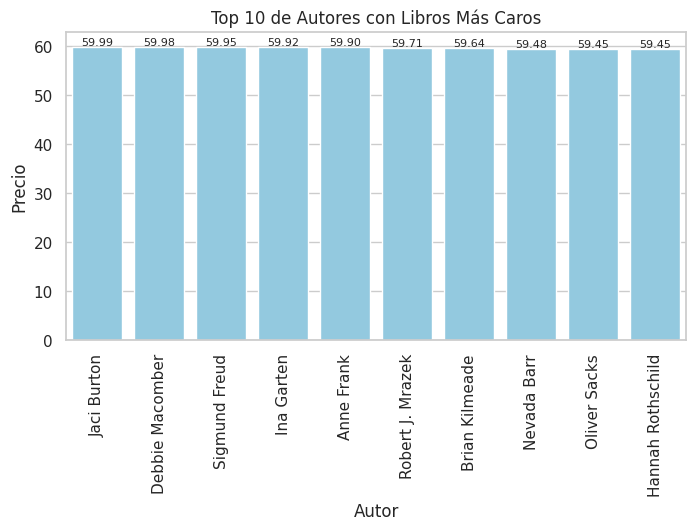

In [ ]:
df_ordenado = df.sort_values(by='Precio Con Tax', ascending=False)

# Obtener el top 5 de libros más caros
top5_caros = df_ordenado.head(10)

# Crear un gráfico de barras apiladas del top 5 de libros más caros por género

barplot = sns.barplot(x='Autor', y='Precio Con Tax', color='skyblue', data=top5_caros)
for index, value in enumerate(top5_caros['Precio Con Tax']):
    barplot.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)
plt.title('Top 10 de Autores con Libros Más Caros')
plt.xlabel('Autor')
plt.ylabel('Precio')
plt.xticks(rotation=90)

